## Name: Michael Jagdharry <br> Course Name: CIS 9655 <br>  Assignment: Matplotlib Dashboard - Unemployment Statistics Post-COVID19

<b>Sources</b>: 
This is data collected from the Bureau of Labor Statistics regarding unemployment in the era of COVID-19.  The following datasets from this link were used:
1. LNS13000000 (Unemployment Level in Thousands for individuals 16 years and older) <br>
https://data.bls.gov/timeseries/LNS13000000
2. LNS14000000 (Unemployment Rate in Thousands for individuals 16 years and older) <br>
https://data.bls.gov/timeseries/LNS14000000
3. LNS14000003 (Unemployment Rate in Thousands for Whites) <br>
https://data.bls.gov/timeseries/LNS14000003
4. LNS14000006 (Unemployment Rate in Thousands for African Americans) <br>
https://data.bls.gov/timeseries/LNS14000006
5. LNS14000009 (Unemployment Rate in Thousands for Hispanics/Latinos) <br>
https://data.bls.gov/timeseries/LNS14000009

### Description:
The line chart shows clearly the dramatic spike in unemployed people occuring around March 2020. The bar chart supports this data by showing the maximum unemployment rates within each year since 2010 - from this chart, it is clear that 2020 has presented the greatest maximum to unemployment in at least a decade. The frequency distribution plot depicts the rarity of occurrence of specific ranges of unemployment levels. The histogram appears to be bimodal, with the greater mode between approximately 5,500,000 and 9,000,000 people unemployed during a given month, and the lesser mode between about 11,000,000 and 14,000,000 people. The COVID19 unemployment phenomenon barely shows up at the right end of the graph, illustrating its rarity. The last two graphs attempt to illustrate any potential differentials in unemployment post COVID-19 by race. The scatterplot illustrates that, although throughout the past year unemployment has increased for every race, black unemployment consistently leads white unemployment, even after the pandemic occurred; that is, for each point, the x-coordinate is always greater than the y-coordinate. The pie chart provides a simplified but more accessible depiction. We can see here that although the proportions are somewhat each close to 1/3rd, black unemployment is still about 50% greater than white unemployment.

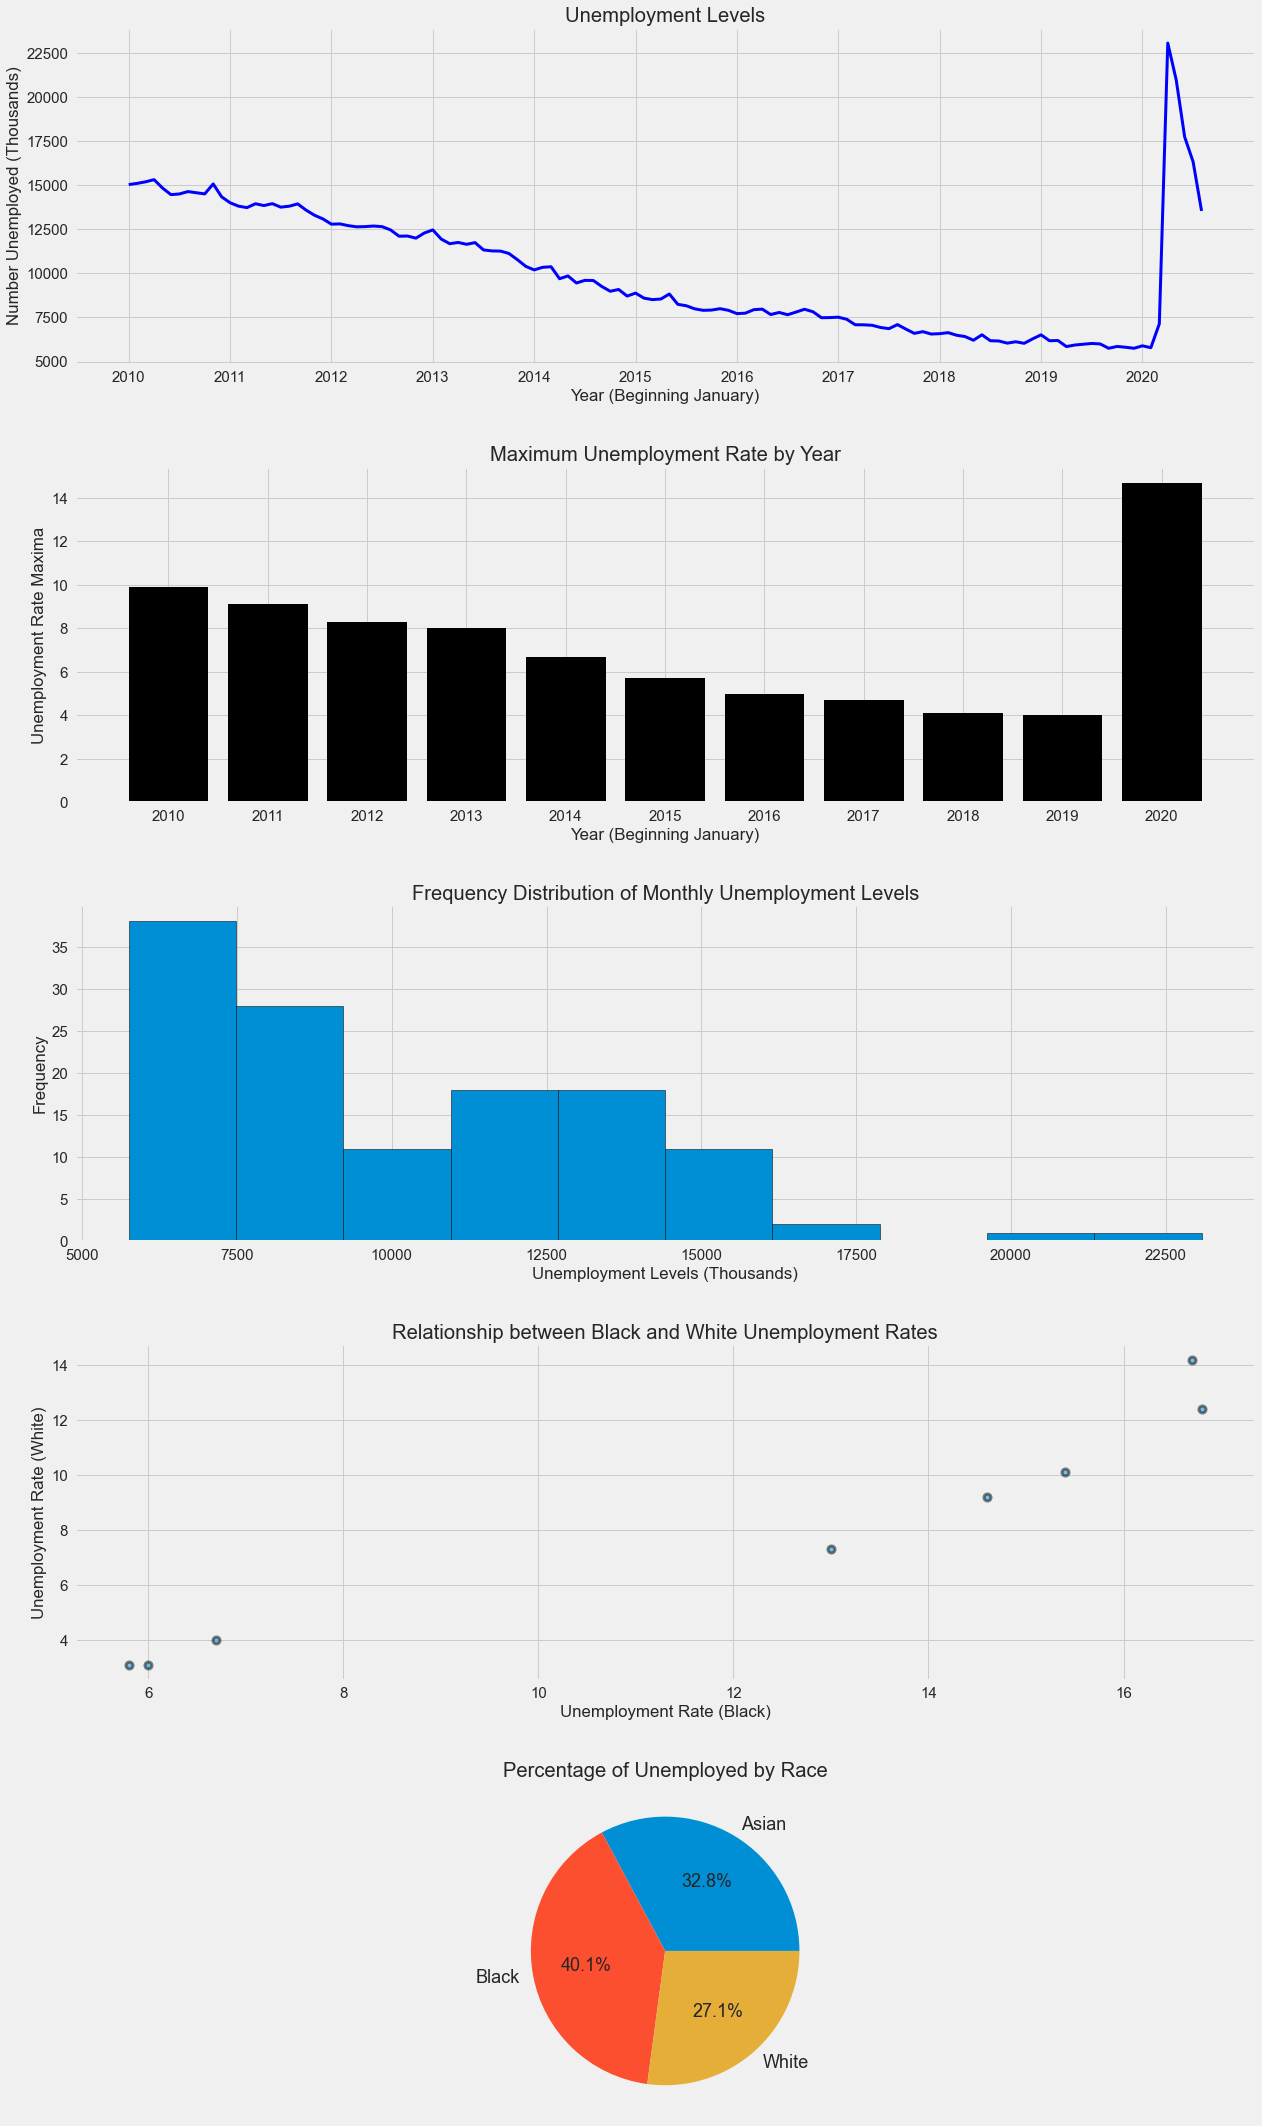

In [140]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from datetime import datetime

fig, (ax1, ax2, ax5, ax4, ax3) = plt.subplots(nrows=5,ncols=1,sharex=False)
t = pd.date_range("2010-01","2020-08", freq="MS").strftime("%m-%y")
ticks = pd.date_range("2010-01","2020-08", freq="AS-JAN").strftime("%m-%y")
labels = pd.date_range("2010-01","2020-08", freq="AS-JAN").strftime("%Y")

ul = pd.read_csv("ul_vector.csv",index_col='dates').dropna().set_index(t)
ax1.plot(ul, color="blue", linestyle="-", marker='', linewidth=3, label="Unemployment Level")
ax1.set_title("Unemployment Levels")
ax1.set_xlabel("Year (Beginning January)")
ax1.set_ylabel("Number Unemployed (Thousands)")
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels, fontsize=15)
ax1.tick_params(axis='y', labelsize=15)


max_ur = [9.9,9.1,8.3,8,6.7,5.7,5,4.7,4.1,4,14.7]
ax2.bar(x=labels, height=max_ur, color="black", label="Maximum Unemployment Rate by Year")
ax2.set_title("Maximum Unemployment Rate by Year")
ax2.set_xlabel("Year (Beginning January)")
ax2.set_ylabel("Unemployment Rate Maxima")
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)


slices = [10.4, 12.7, 8.6]
colors = ['orange','blue','green']
labels = ['Asian','Black','White']
ax3.pie(slices, labels=labels, textprops={'fontsize': 18}, autopct='%1.1f%%')
ax3.set_title("Percentage of Unemployed by Race")


black_ur = [6,5.8,6.7,16.7,16.8,15.4,14.6,13]
white_ur = [3.1,3.1,4,14.2,12.4,10.1,9.2,7.3]
ax4.scatter(black_ur,white_ur,marker="o", edgecolor="black", linewidth=3, alpha=.5)
ax4.set_title("Relationship between Black and White Unemployment Rates for 2020")
ax4.set_xlabel("Monthly Unemployment Rate (Black)")
ax4.set_ylabel("Monthly Unemployment Rate (White)")
ax4.tick_params(axis='y', labelsize=15)
ax4.tick_params(axis='x', labelsize=15)

ul_freq=[15046,15113,15202,15325,14849,14474,14512,14648,14579,14516,15081,14348,14013,13820,13737,13957,13855,13962,13763,13818,13948,13594,13302,13093,12797,12813,12713,12646,12660,12692,12656,12471,12115,12124,12005,12298,12471,11950,11689,11760,11654,11751,11335,11279,11270,11136,10787,10404,10202,10349,10380,9702,9859,9460,9608,9599,9262,8990,9090,8717,8885,8599,8515,8550,8834,8247,8167,7992,7907,7922,8000,7907,7721,7746,7945,7975,7668,7786,7658,7809,7967,7827,7488,7495,7518,7399,7088,7085,7059,6933,6867,7097,6841,6599,6697,6561,6582,6641,6493,6418,6209,6519,6180,6167,6045,6123,6034,6286,6516,6181,6194,5850,5938,5985,6027,5999,5753,5857,5811,5753,5892,5787,7140,23078,20985,17750,16338,13550]
ax5.hist(ul_freq, edgecolor="black")
ax5.set_title("Frequency Distribution of Monthly Unemployment Levels")
ax5.set_ylabel("Frequency")
ax5.set_xlabel("Unemployment Levels (Thousands)")
ax5.tick_params(axis='y', labelsize=15)
ax5.tick_params(axis='x', labelsize=15)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 30.5)
fig.tight_layout(pad=3.0)
plt.style.use('fivethirtyeight')
plt.show()